<a href="https://colab.research.google.com/github/Ahmad3752/Colab/blob/main/EDA_ON_TITANINC_AND_NYX_AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns



df = sns.load_dataset("titanic")

print(f"The data is:\n{df.head(2)}")

print("\nColumn names")
print(df.columns)
print("\nData types of each colum")
print(df.dtypes)

print("\nSummary statistics for numerical columns")
print(df.describe())
print("\nMissing values ")
print(df.isna().sum())

The data is:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  

Column names
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Data types of each colum
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: 

Their might be some redundancies as i have written the whple qustion 2 code on a single line

In [5]:
# TASK 2 QUESTION 1: Handling Missing Age Values
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)
print(f"Missing values in 'age' after filling: {df['age'].isna().sum()}")

# Dropping missing values in 'embark_town'
df = df.dropna(subset=['embark_town'])
print(f"Missing values in 'embark_town' after deletion: {df['embark_town'].isna().sum()}")

# QUESTION 2: Creating 'family_size' and 'travel_alone'
df['family_size'] = df['sibsp'] + df['parch']
print(df[['sibsp', 'parch', 'family_size']].head())

# Ensuring 'alone' column exists before assignment
if 'alone' in df.columns:
    df['travel_alone'] = df['alone']
else:
    print("Column 'alone' does not exist in the DataFrame.")

# QUESTION 3: Filtering DataFrame for Age Range 18-50
filtered_df = df[(df['age'] >= 18) & (df['age'] <= 50)]
print("THE FILTERED DATAFRAME IS:")
print(filtered_df.head(2))  # Better than using f-string


Missing values in 'age' after filling: 0
Missing values in 'embark_town' after deletion: 0
   sibsp  parch  family_size
0      1      0            1
1      1      0            1
2      0      0            0
3      1      0            1
4      0      0            0
THE FILTERED DATAFRAME IS:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   

     who  adult_male deck  embark_town alive  alone  family_size  travel_alone  
0    man        True  NaN  Southampton    no  False            1         False  
1  woman       False    C    Cherbourg   yes  False            1         False  


In [14]:
#Task3
import matplotlib.pyplot as plt
grouped_data=df.groupby(['pclass', 'sex'])
survival_rates=grouped_data['survived'].mean() #grouped_data['survived'].value_counts(normalize=True) this is wrong q k 1 dataframe hai or valuecounts se or complex ho jatha hai

pclass  sex   
1       female    0.967391
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

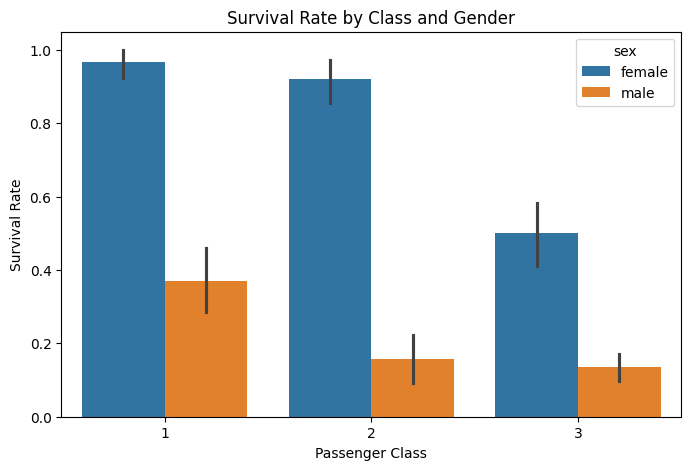

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='pclass', y='survived', hue='sex')
plt.title("Survival Rate by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


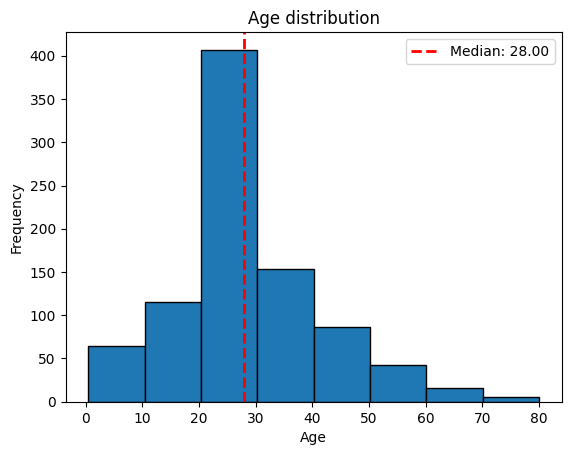

The median is 28.0


In [31]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=8, edgecolor='black')
#Using axvline for median
plt.axvline(df['age'].median(), color='red', linestyle='dashed', linewidth=2, label=f'Median: {df["age"].median():.2f}')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')

plt.legend()

plt.show()

print(f"The median is {df['age'].median()}")


<ipython-input-34-a4d2580964c0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='pclass', y='fare',palette='Set2')


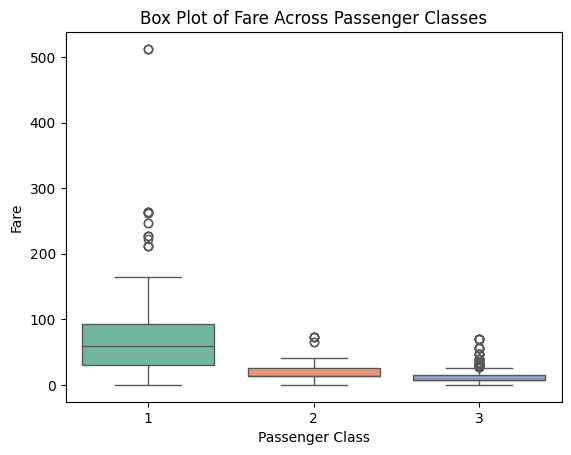

In [34]:
sns.boxplot(data=df, x='pclass', y='fare',palette='Set2')
plt.title('Box Plot of Fare Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Fare');

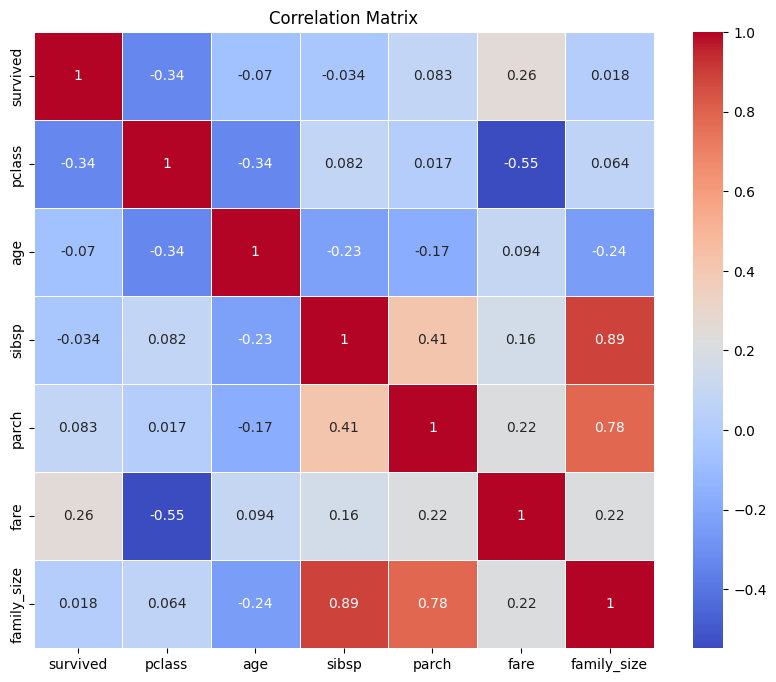

In [46]:
# selecting only numeric columns
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',  linewidths=0.5)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()



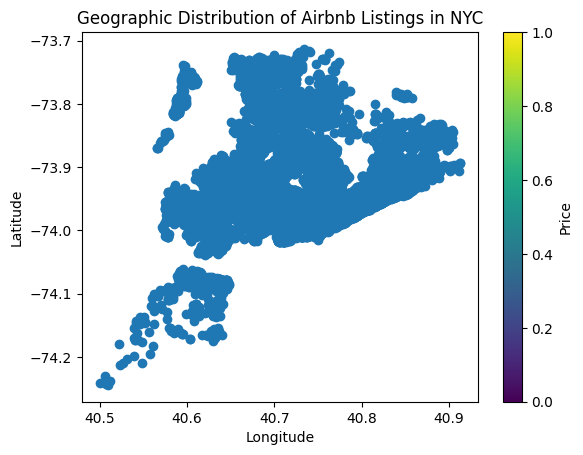

In [58]:
plt.scatter(data=df1,x='latitude',y='longitude',c='price');#color based on price
plt.title('Geographic Distribution of Airbnb Listings in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Price')  # Color bar to show price variation
plt.show()


Text(0, 0.5, 'Average Price ($)')

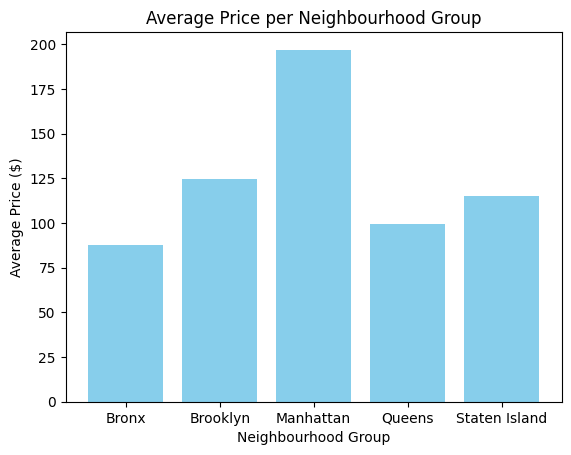

In [69]:
grpd_data=df1.groupby('neighbourhood_group')
avg_price=grpd_data['price'].mean()
plt.bar(avg_price.index, avg_price.values, color='skyblue')
plt.title('Average Price per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price ($)')

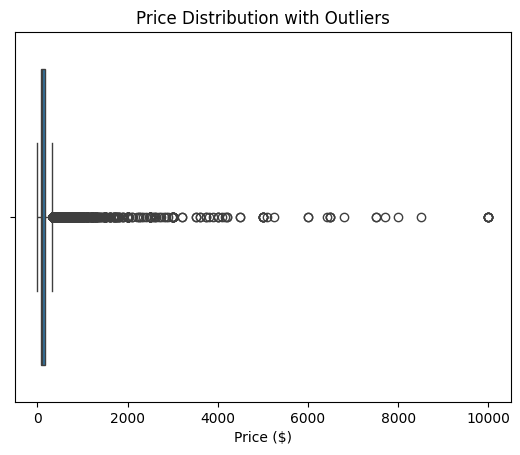

In [76]:
sns.boxplot(x=df1['price'])
plt.title('Price Distribution with Outliers')
plt.xlabel('Price ($)')
plt.show()
